# Challenge
Data cleaning is definitely a "practice makes perfect" skill. In this challenge, you'll use this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013.

You can find the [CSV file here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/WELLCOME/WELLCOME_APCspend2013_forThinkful.csv) and a [description of the dataset here](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/WELLCOME/Readme_file.docx).

To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

You will need to do considerable data cleaning in order to extract accurate estimates. You may may want to look into data [encoding methods](https://stackoverflow.com/questions/2241348/what-is-unicode-utf-8-utf-16) if you get stuck. For a real bonus round, identify the open access prices paid by subject area.

Remember not to modify the data directly. Instead, write a cleaning script that will load the raw data and whip it into shape. Jupyter notebooks are a great format for this. Keep a record of your decisions: well-commented code is a must for recording your data cleaning decision-making progress. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [439]:
data = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/WELLCOME/WELLCOME_APCspend2013_forThinkful.csv", encoding = "ISO-8859-1")   #UTF-8 was giving an error
print(data.shape)
data.head()   #check if data extracted successfully

(2127, 5)


,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [302]:
#Remove any rows that contain only NaNs
data = data.dropna (how = 'all')
print(data.shape)    #None of the rows have all NaNs

(2127, 5)


In [303]:
#Rename cost column to make it easier to call
data = data.rename(columns = {"COST (£) charged to Wellcome (inc VAT when charged)": "COST"})

,PMID/PMCID,Publisher,Journal title,Article title,COST
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [304]:
#Change all elements to strings
data['Journal title'] = data['Journal title'].astype(str)
orig_data = data.copy()    #Save so we don't have to keep re-uploading file if something gets messed up
np.unique(data['Journal title'])    #list of "unique" journal titles 

array(['ACS Chemical Biology', 'ACS Chemical Neuroscience', 'ACS NANO',
       'ACS Nano', 'ACTA F', 'AGE', 'AIDS', 'AIDS Behav', 'AIDS Care',
       'AIDS Journal', 'AIDS Research and Therapy', 'AIDS UK',
       'ASN Neuro', 'Academy of Nutrition and Dietetics',
       'Acta Crystallographica Section D,  Biological Crystallography ',
       'Acta Crystallographica Section D: Biological Crystallography',
       'Acta Crystallographica Section F: Structural Biology and Crystallization Communications',
       'Acta Crystallographica, Section D', 'Acta Crystallography D',
       'Acta D', 'Acta Dermato Venereologica', 'Acta Diabetologica',
       'Acta Neuropathol', 'Acta Neuropathologica', 'Acta Opthalmologica',
       'Acta Physiol', 'Addiction',
       'Advances in Experimental Medicine and Biology', 'Age',
       'Age and Ageing', 'Ageing & Society', 'Aging Cell', 'Aids Care',
       'Alcohol and Alcoholism',
       'Alimentrary Pharmacology & Therapeutics', 'Am J Bioeth',
       'Am 

In [318]:
import re
#Strip excess whitespace from titles, capitalize everything, replace & with AND
#Change common abbreviations to full names
#These edits will hopfully make "unique" titles match, thereby reducing total number of unique titles

for i in range(len(data['Journal title'])):
    data['Journal title'][i] = data['Journal title'][i].rstrip().upper().replace('&', 'AND').replace('  ', ' ')
    data['Journal title'][i] = data['Journal title'][i].replace('JNL OF ', 'JOURNAL OF ').replace('J ', 'JNL ').replace('JNL ', 'JOURNAL OF ')
    data['Journal title'][i] = data['Journal title'][i].replace('CLIN ', 'CLINICAL ').replace('TROP ','TROPICAL ').replace('J.', 'JOURNAL')
    data['Journal title'][i] = data['Journal title'][i].replace('ORG ', 'ORGANIC ').replace('SCI ', 'SCIENCES ').replace('CHEM ', 'CHEMISTRY ')
    data['Journal title'][i] = data['Journal title'][i].replace('PLOS', 'PUBLIC LIBRARY OF SCIENCE -').replace(' USA', ' UNITED STATES OF AMERICA')
    data['Journal title'][i] = data['Journal title'][i].replace('NUTR ', 'NUTRITION ').replace('INT ', 'INTERNATIONAL ').replace('MOL ', 'MOLECULAR')
    data['Journal title'][i] = data['Journal title'][i].replace('AM ', 'AMERICAN ').replace('ANAL ', 'ANALYTICAL ').replace('BIOANAL ', 'BIOANALYTICAL ')
    data['Journal title'][i] = data['Journal title'][i].replace('BIOCHEM ', 'BIOCHEMICAL ').replace('IOL ', 'IOLOGY ').replace('BMC ', 'BIOMED CENTRAL ')
    data['Journal title'][i] = data['Journal title'][i].replace('BRT ', 'BRITISH ').replace('CURR ', 'CURRENT ').replace('EUR ', 'EUROPEAN ').replace('DIS ', 'DISEASE ')
    data['Journal title'][i] = data['Journal title'][i].replace('INFECT ', 'INFECTIOUS ').replace(' MED ', ' MEDICAL ').replace('CHEM.', 'CHEMISTRY')
    data['Journal title'][i] = data['Journal title'][i].replace('(PNAS ', '(PNAS) ').replace('PNAS (', '(PNAS) ').replace('PNAS ', 'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES ')
    data['Journal title'][i] = re.sub(r"\bPNAS$\b","PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES", data['Journal title'][i])
    #data['Journal title'][i] = re.sub(r'\( *', '', data['Journal title'][i])
    data['Journal title'][i] = re.sub(r' \)]*', '', data['Journal title'][i])
    data['Journal title'][i] = re.sub(r' \(]*$', '', data['Journal title'][i])
    data['Journal title'][i] = re.sub(r'OL$', 'OLOGY', data['Journal title'][i])
    data['Journal title'][i] = re.sub(r'SCI\.', 'SCIENCE ', data['Journal title'][i])   

sorted(list(np.unique(data["Journal title"])), key=len)[::-1]    #View sorted list of titles, see that some have been removed

['STUDIES IN HISTORY AND PHILOSOPHY OF SCIENCE PART C: STUDIES IN HISTORY AND PHILOSOPHY OF BIOLOGICAL AND BIOMEDICAL SCIENCES',
 'EVIDENCE, ETHOS AND EXPERIMENT: THE ANTHROPOLOGY AND HISTORY OF MEDICAL RESEARCH IN AFRICA.',
 'HEALTH: AN INTERDISCIPLINARY JOURNAL FOR THE SOCIAL STUDY OF HEALTH, ILLNESS AND MEDICINE',
 'PHILOSOPHICAL TRANSACTIONS OF THE ROYAL SOCIETY OF LONDON. SERIES B, BIOLOGICAL SCIENCES',
 'ACTA CRYSTALLOGRAPHICA SECTION F: STRUCTURAL BIOLOGY AND CRYSTALLIZATION COMMUNICATIONS',
 '(PNAS) PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA',
 'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA',
 'PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF UNITED STATES OF AMERICA',
 'PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES UNITED STATES OF AMERICA',
 'JOURNAL OF THE ROYAL STATISTICAL SOCIETY: SERIES C (APPLIED STATISTICS)',
 'INTERNATIONAL JOURNAL OF APPLIED EARTH OBSERVATION AND GEOINFORMATION',
 'JOURNAL OF E

In [307]:
#Use Python's SequenceMatcher to fix slight misspellings
#Ratio determines how similar the strings have to be
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


In [322]:
#Sort unique titles by length, with longest first
unique_titles = sorted(list(np.unique(data["Journal title"])), key=len)[::-1]

#Go through all unique titles, compare to all other uniques. If similarity is high, replace matches with longest of the two being compared.
for i in range(len(unique_titles)):
    print(unique_titles[i])
    for j in range(i+1, len(unique_titles)):
        if similar(unique_titles[i], unique_titles[j])>0.9:
            old_ind = np.where(data['Journal title'].str.contains(unique_titles[j]))
            if i !=j:
                print(unique_titles[j])
                #Ask user if these are misspelling or actual differences 
                #(Some matches will show up as high similarity even if actually different, i.e. Biochemistry vs. Chemistry)
                diff = input("Are these journals different?: ")
                if diff == 'n' or diff == 'N':
                    if len(unique_titles[i]) > len(unique_titles[j]):
                        data['Journal title'][old_ind[0]] = unique_titles[i]
                    else:
                        data['Journal title'][old_ind[0]] = unique_titles[j]
                else:
                    print('Diff\n')
    print('________________________________')
    
#Re-sort by length, with longest first
unique_titles = sorted(ist(np.unique(data["Journal title"])), key=len)[::-1]

STUDIES IN HISTORY AND PHILOSOPHY OF SCIENCE PART C: STUDIES IN HISTORY AND PHILOSOPHY OF BIOLOGICAL AND BIOMEDICAL SCIENCES
________________________________
EVIDENCE, ETHOS AND EXPERIMENT: THE ANTHROPOLOGY AND HISTORY OF MEDICAL RESEARCH IN AFRICA.
________________________________
HEALTH: AN INTERDISCIPLINARY JOURNAL FOR THE SOCIAL STUDY OF HEALTH, ILLNESS AND MEDICINE
________________________________
PHILOSOPHICAL TRANSACTIONS OF THE ROYAL SOCIETY OF LONDON. SERIES B, BIOLOGICAL SCIENCES
________________________________
ACTA CRYSTALLOGRAPHICA SECTION F: STRUCTURAL BIOLOGY AND CRYSTALLIZATION COMMUNICATIONS


C:\Users\Amichai\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


________________________________
(PNAS) PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA
Are these journals different?: N
PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF UNITED STATES OF AMERICA
Are these journals different?: n
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES UNITED STATES OF AMERICA
Are these journals different?: n
________________________________
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA
(PNAS) PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF THE UNITED STATES OF AMERICA
Are these journals different?: n
PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF UNITED STATES OF AMERICA
Are these journals different?: n
PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES UNITED STATES OF AMERICA
Are these journals different?: n
________________________________
PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF UNITED STATES OF AME

________________________________
DIAGNOSTIC MICROBIOLOGY AND INFECTIOUS DISEASE
________________________________
JOURNAL OF THE AMERICAN COLLEGE OF CARDIOLOGY
________________________________
JOURNAL OF CONSULTING AND CLINICAL PSYCHOLOGY
________________________________
JOURNAL OF CEREBRAL BLOOD FLOW AND METABOLISM
________________________________
JOURNAL OF AUTISM AND DEVELOPMENTAL DISORDERS
JOURNAL OF AUTISM AND DEVELOPMENT DISORDERS
Are these journals different?: n
________________________________
INTERNATIONAL JOURNAL OF GERIATRIC PSYCHIATRY
________________________________
EXPERT REVIEWS IN ANTI-INFECTIVE CHEMOTHERAPY
________________________________
ADVANCES IN EXPERIMENTAL MEDICINE AND BIOLOGY
________________________________
PUBLIC LIBRARY OF SCIENCE - MEDICINE JOURNAL
________________________________
JOURNAL OF NUTRITION EDUCATION AND BEHAVIOUR
________________________________
JOURNAL OF EPIDEMIOLOGY AND COMMUNITY HEALTH
________________________________
JOURNAL OF CHEMICAL INF

________________________________
INTERNATIONAL JOURNAL OF RHEUMATOLOGY
________________________________
INTERNATIONAL JOURNAL OF PARASITOLOGY
INTERNATIONAL JOURNAL FOR PARASITOLOGY
Are these journals different?: n
INTERNATIONAL JOURNAL OF CARDIOLOGY
Are these journals different?: y
Diff

________________________________
INTERNATIONAL JOURNAL OF EPIDEMIOLOGY
INYERNATIONAL JOURNAL OF EPIDEMIOLOGY
Are these journals different?: n
INTERNATIONAL JOURAL OF EPIDEMIOLOGY
Are these journals different?: n
________________________________
HAEMATOLOGICA/THE HAEMATOLOGY JOURNAL
________________________________
FRONTIERS IN INTEGRATIVE NEUROSCIENCE
________________________________
FRONTIERS IN DEVELOPMENTAL PSYCHOLOGY
________________________________
CURRENT TOPICS IN MEDICINAL CHEMISTRY
________________________________
ANTIMICROBIAL AGENTS AND CHEMOTHERAPY
ANTIMICROBIAL AGFENTS AND CHEMOTHERAPY
Are these journals different?: n
ANTIMICOBIAL AGENTS AND CHEMOTHERAPY
Are these journals different?: n
__

________________________________
FRONTIERS IN IMMUNOLOGICAL MEMORY
________________________________
FREE RADICAL AND BIOLOGY MEDICINE
________________________________
EUROPEAN JOURNAL OF PUBLIC HEALTH
________________________________
EUROPEAN JOURNAL OF ENDOCRINOLOGY
________________________________
CLINICAL AND EXPERIMENTAL ALLERGY
________________________________
AMERICAN JOURNAL OF PUBLIC HEALTH
________________________________
ACTA CRYSTALLOGRAPHICA, SECTION D
________________________________
REPRODUCTION(CAMBRIDGE, ENGLAND)
________________________________
PROCEEDINGS OF THE ROYAL SOCIETY
PROCEEDINGS OF ROYAL SOCIETY
Are these journals different?: n
________________________________
JOURNAL OF SMALL ANIMAL PRACTICE
________________________________
JOURNAL OF PARASITOLOGY RESEARCH
________________________________
JOURNAL OF COMPARATIVE NEUROLOGY
________________________________
JOURNAL OF CLINICAL MICROBIOLOGY
JOUNRAL OF CLINICAL MICROBIOLOGY
Are these journals different?: n
_______

________________________________
COGNITIVE THERAPY AND RESEARCH
________________________________
CELL DEATH AND DIFFERENTIATION
CELL DEATH DIFFERENTIATION
Are these journals different?: n
________________________________
CALCIFIED TISSUE INTERNATIONAL
________________________________
BRITISH JOURNAL OF HAEMATOLOGY
BRITISH JOURNAL OF PHARMACOLOGY
Are these journals different?: y
Diff

BRITISH JOURNAL OF DERMATOLOGY
Are these journals different?: y
Diff

________________________________
BRITISH JOURNAL OF DERMATOLOGY
BRITISH JOURNAL OF HAEMATOLOGY
Are these journals different?: y
Diff

________________________________
BRITISH JOUNAL OF PHARMACOLOGY
BRITISH JOURNAL OF PHARMACOLOGY
Are these journals different?: n
________________________________
BIOMED CENTRAL MEDICAL IMAGING
________________________________
BEHAVIOUR RESEARCH AND THERAPY
BEHAVIOR RESEARCH AND THERAPY
Are these journals different?: n
________________________________
ARTHRITIS RESEARCH AND THERAPY
_________________________

Are these journals different?: n
________________________________
CHILD PSYCHOLOGY PSYCHIATRY
________________________________
CELL ADHESION AND MIGRATION
________________________________
BRIEFINGS IN BIOINFORMATICS
________________________________
BIOMED CENTRAL NEUROSCIENCE
________________________________
BIOMED CENTRAL MICROBIOLOGY
________________________________
ASIAN JOURNAL OF PSYCHIATRY
AMERICAN JOURNAL OF PSYCHIATRY
Are these journals different?: y
Diff

________________________________
ZOONOSES AND PUBLIC HEALTH
________________________________
TISSUE ENGINEERING: PART A
________________________________
STEM CELLS AND DEVELOPMENT
________________________________
SOCIAL HISTORY OF MEDICINE
________________________________
OSTEOPOROSIS INTERNATIONAL
________________________________
NEURODEGENERATIVE DISEASES
________________________________
NEGLECTED TROPICAL DISEASE
________________________________
MOLECULAR MEMBRANE BIOLOGY
________________________________
JOURNAL OF VIRAL H

________________________________
STATISTICS IN MEDICINE
________________________________
SCHIZOPHRENIA RESEARCH
________________________________
SCHIZOPHRENIA BULLETIN
________________________________
PYSCHOLOGICAL MEDICINE
PSYCHOLOGICAL MEDICINE
Are these journals different?: n
________________________________
PSYCHOLOGICAL MEDICINE
PYSCHOLOGICAL MEDICINE
Are these journals different?: n
________________________________
NUCLEIC ACIDS RESEARCH
NUCLEIC ACID RESEARCH
Are these journals different?: n
________________________________
MOLECULAR MICROBIOLOGY
________________________________
MICROBES AND INFECTION
________________________________
INFECTION AND IMMUNITY
________________________________
HEALTH POLICY PLANNING
________________________________
FRONTIERS IN COGNITION
________________________________
EXPERIMENTAL NEUROLOGY
________________________________
ESSAYS IN BIOCHEMISTRY
________________________________
DEPRESSION AND ANXIETY
________________________________
CHEMICAL COMMUNI

________________________________
AGEING AND SOCIETY
________________________________
ACTA DIABETOLOGICA
________________________________
VETERINARY RECORD
________________________________
THE FASEB JOURNAL
THE FEBS JOURNAL
Are these journals different?: y
Diff

________________________________
STEM CELL REPORTS
________________________________
NUTRITION JOURNAL
________________________________
NEUROPHARMACOLOGY
________________________________
NEUROEPIDEMIOLOGY
________________________________
MOLECULAR BIOLOGY
________________________________
MARTEN CHILD NUTR
________________________________
JOURNAL OF VISION
________________________________
HUM RESOUR HEALTH
________________________________
HEALTH PSYCHOLOGY
________________________________
EPILEPSY RESEARCH
________________________________
DIABETIC MEDICINE
________________________________
DEV. WORLD BIOETH
DEV WORLD BIOETH.
Are these journals different?: n
________________________________
DEV WORLD BIOETH.
DEV. WORLD BIOETH
Are th

Are these journals different?: n
________________________________
CELL CYCLE
________________________________
BIOSYSTEMS
________________________________
AIDS BEHAV
________________________________
AGING CELL
________________________________
STRUCTURE
________________________________
PROTEMICS
________________________________
NEUROLOGY
________________________________
MATURITAS
________________________________
INTERFACE
________________________________
HEPTOLOGY
HEPATOLOGY
Are these journals different?: n
________________________________
FRONTIERS
________________________________
EVOLUTION
________________________________
EPILEPSIA
________________________________
ENDEAVOUR
________________________________
COGNITION
________________________________
CENTAURUS
________________________________
BIOETHICS
________________________________
BIOCHIMIE
________________________________
AUTOPHAGY
________________________________
ASN NEURO
________________________________
AIDS CARE
________________

In [324]:
cleaned_Data = data.copy()    #Save in case something gets messed up later. Cleaning takes time, so no point in doing it more than once

len(sorted(list(np.unique(data["Journal title"])), key=len)[::-1])   #Determine new number of unique titles after cleaning

761

In [532]:
unique_titles = sorted(list(np.unique(data["Journal title"])), key=len)[::-1]  #sort unique titles by length
unique_titles   #list the unique titles

['STUDIES IN HISTORY AND PHILOSOPHY OF SCIENCE PART C: STUDIES IN HISTORY AND PHILOSOPHY OF BIOLOGICAL AND BIOMEDICAL SCIENCES',
 'EVIDENCE, ETHOS AND EXPERIMENT: THE ANTHROPOLOGY AND HISTORY OF MEDICAL RESEARCH IN AFRICA.',
 'HEALTH: AN INTERDISCIPLINARY JOURNAL FOR THE SOCIAL STUDY OF HEALTH, ILLNESS AND MEDICINE',
 'PHILOSOPHICAL TRANSACTIONS OF THE ROYAL SOCIETY OF LONDON. SERIES B, BIOLOGICAL SCIENCES',
 'ACTA CRYSTALLOGRAPHICA SECTION F: STRUCTURAL BIOLOGY AND CRYSTALLIZATION COMMUNICATIONS',
 'JOURNAL OF THE ROYAL STATISTICAL SOCIETY: SERIES C (APPLIED STATISTICS)',
 'INTERNATIONAL JOURNAL OF APPLIED EARTH OBSERVATION AND GEOINFORMATION',
 'JOURNAL OF EXPERIMENTAL PSYCHOLOGY: HUMAN PERCEPTION AND PERFORMANCE',
 'INTERNATIONAL JOURNAL OF BEHAVIOURAL NUTRITION AND PHYSICAL ACTIVITY',
 'TRANSACTIONS OF THE ROYAL SOCIETY OF TROPICAL MEDICINE AND HYGIENE',
 'JOURNAL OF THE AMERICAN ACADEMY OF CHILD AND ADOLESCENT PSYCHIATRY',
 'BIRTH DEFECTS RESEARCH PART A: CLINICAL AND MOLECULAR TE

In [533]:
#data = cleaned_Data.copy()    #Use if something got messed up

#Determine if any costs are reported in something other than £ or $
data['COST'][list(np.where(~data['COST'].str.contains('\£'))[0])]    #Only £ and $ exist in COST

#Convert $ COST to £ COST
dol_to_pound = 0.83     #Current conversion rate: £/$
for item in list(np.where(~data['COST'].str.contains('\£'))[0]):
    data['COST'][item] = '£'+str(round(float(data['COST'][item].split('$')[0])*dol_to_pound,2))
    
#Convert all cost strings to floats
for i in range(len(data['COST'])):
    data['COST'][i] = round(float(data['COST'][i].split('£')[1]),2)

data['COST']   #Print all COST values, analyze for interesting trends
#Several cost values are on the order of 10^6, which are likely outliers.


0             0
1       2381.04
2        642.56
3        669.64
4        685.88
5        2392.2
6       2367.95
7        649.33
8       1294.59
9       1294.78
10      1329.69
11       1287.2
12      1324.66
13       665.64
14      1006.72
15       238.08
16       265.67
17         2035
18      3108.08
19      1267.76
20      2286.73
21       947.07
22       1186.8
23       642.89
24      1533.29
25      2082.74
26       2314.1
27       759.67
28      1565.26
29       572.74
         ...   
2097    2236.02
2098    2275.02
2099    2373.57
2100     791.19
2101    1551.49
2102    1961.68
2103    1982.35
2104    2239.22
2105    2377.65
2106    2272.15
2107     1900.7
2108    3026.17
2109    1851.15
2110    1812.89
2111     1816.7
2112    2168.05
2113    1409.96
2114       2400
2115    1968.63
2116    2015.72
2117    1836.92
2118    1836.92
2119     1375.8
2120    1836.92
2121    2009.65
2122    1334.15
2123    1834.77
2124    1834.77
2125    2374.52
2126    2034.75
Name: COST, Length: 2127

In [554]:
import statistics

#Count number of articles and record the set of costs for each unique journal (one cost per article)
article_counts = []
costs = []

for i in range(len(unique_titles)):
    article_counts.append(len(list(np.where(data['Journal title'] == unique_titles[i])[0])))
    costs.append(list(data['COST'][list(np.where(data['Journal title'] == unique_titles[i])[0])]))
    
#Create new dataframe that holds the data we've extracted   
final_data = pd.DataFrame(columns = ['Unique Journal Title', 'Number of Articles'])
final_data['Unique Journal Title'] = unique_titles
final_data['Number of Articles'] = article_counts
final_data['COST'] = costs

#Sort new dataframe so that journals with largest number of articles are at top
final_data = final_data.sort_values(by = 'Number of Articles', ascending = False)
final_data = final_data.reset_index(drop=True)
final_data = final_data[:5]    #Only save top 5, based on number of articles
final_data    #Print current data to see if they match initial assumptions

,Unique Journal Title,Number of Articles,COST
0,PUBLIC LIBRARY OF SCIENCE -,300,"[1429.13, 1494.42, 1761.48, 1283.76, 1001.03, ..."
1,BIOLOGICIAL CHEMISTRY,72,"[265.67, 1100.0, 2259.64, 1487.46, 1531.08, 10..."
2,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,36,"[1241.1, 603.42, 660.59, 625.0, 667.74, 853.64..."
3,NEUROIMAGE,29,"[1758.89, 2345.0, 1747.16, 1760.94, 1762.69, 1..."
4,NUCLEIC ACIDS RESEARCH,29,"[1704.0, 2184.0, 852.0, 852.0, 852.0, 852.0, 8..."


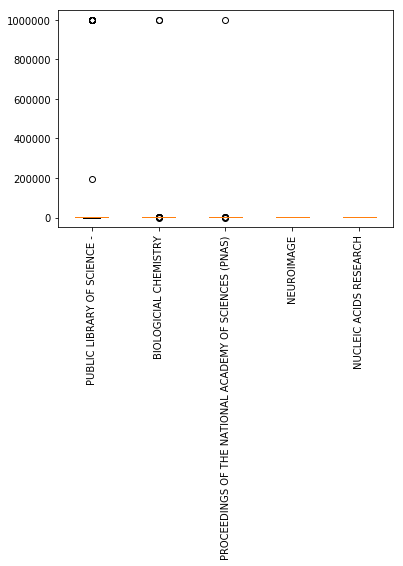

In [555]:
#Boxplots to see current data spread
plt.boxplot(list(final_data['COST']), labels = final_data['Unique Journal Title'])
plt.xticks(rotation=90)
plt.show()

#Outliers at VERY high values are messing up the boxplots; we can't draw any conclusions


In [556]:
#Need to set the outliers to something more realistic, so they don't skew the data so much
#Set any value above 100,000 to that journal's 75% value, that way they are still high, but not crazy high
for i in range(5):
    for j in range(len(final_data['COST'][i])):
        if final_data['COST'][i][j] > 100000:
            final_data['COST'][i][j] = np.percentile(final_data['COST'][i],75)   #75th percentile value

            

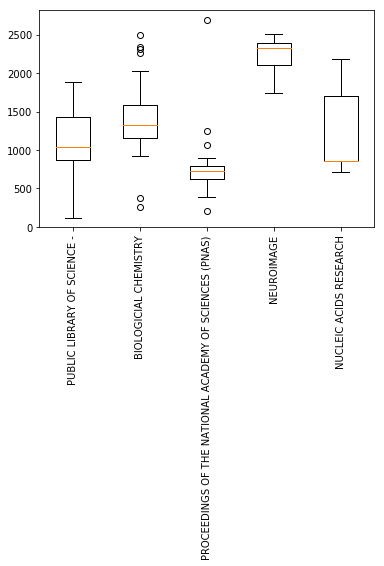

In [557]:
#Try boxplots again
plt.boxplot(list(final_data['COST']), labels = final_data['Unique Journal Title'])
plt.xticks(rotation=90)
plt.show()

#Now it looks much more reasonable to work with!

In [560]:
#Now that we have usable data, calculate mean, median, and mode for the top 5 journals
mean_cost = []
median_cost = []
stdv_cost = []

for i in range(len(final_data['Unique Journal Title'])):
    mean_cost.append(round(statistics.mean(final_data['COST'][i]),2))
    median_cost.append(round(statistics.median(final_data['COST'][i]),2))
    stdv_cost.append(round(statistics.pstdev(final_data['COST'][i]),2))

final_data['Mean Cost'] = mean_cost
final_data['Median Cost'] = median_cost
final_data['Standard Deviation of Cost'] = stdv_cost

final_data   #Print final results

,Unique Journal Title,Number of Articles,COST,Mean Cost,Median Cost,Standard Deviation of Cost
0,PUBLIC LIBRARY OF SCIENCE -,300,"[1429.13, 1494.42, 1761.48, 1283.76, 1001.03, ...",1121.31,1035.24,342.23
1,BIOLOGICIAL CHEMISTRY,72,"[265.67, 1100.0, 2259.64, 1487.46, 1531.08, 10...",1388.27,1319.55,382.59
2,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,36,"[1241.1, 603.42, 660.59, 625.0, 667.74, 853.64...",774.74,733.12,364.97
3,NEUROIMAGE,29,"[1758.89, 2345.0, 1747.16, 1760.94, 1762.69, 1...",2215.17,2326.43,262.02
4,NUCLEIC ACIDS RESEARCH,29,"[1704.0, 2184.0, 852.0, 852.0, 852.0, 852.0, 8...",1162.34,852.00,434.46
